In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import seaborn as sns

In [3]:
rng=np.random.default_rng(seed=420)

In [5]:
nums_sample=100
weights=np.sort(rng.normal(loc=172,scale=29,size=nums_sample))
weights

array([ 68.20069774, 101.61279102, 105.52674848, 120.97023608,
       124.45875826, 126.9119116 , 128.63084786, 130.11818523,
       131.90087368, 133.8088481 , 138.13552704, 138.86114478,
       139.21752331, 142.34155403, 143.07674096, 143.59747855,
       143.8917811 , 144.83209129, 147.92617704, 148.69784604,
       149.47974163, 151.10608619, 152.21130834, 152.38310516,
       154.46748112, 155.27110692, 157.78858783, 158.02043056,
       158.72345862, 159.27709175, 159.84504493, 159.92147568,
       159.97890258, 160.42541389, 164.12466442, 165.22122124,
       165.64195985, 166.6945417 , 166.95144277, 167.29603354,
       167.39976234, 167.54632109, 167.673789  , 167.98060195,
       168.3819632 , 168.63946135, 169.56076723, 169.99506032,
       170.33140138, 170.81769787, 171.47485732, 171.97387962,
       172.50326775, 172.74107707, 173.00470948, 173.81007306,
       174.43463226, 174.84463432, 175.69294901, 175.84229881,
       176.81330181, 178.1833236 , 180.0711676 , 180.23

In [7]:
from scipy import stats

In [8]:
rank=stats.rankdata(weights)/100
rank

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [9]:
random_values=rng.uniform(0,1,nums_sample)
obese=[1 if rv<rn else 0 for rv,rn in zip(random_values,rank)]
obese

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

<Axes: >

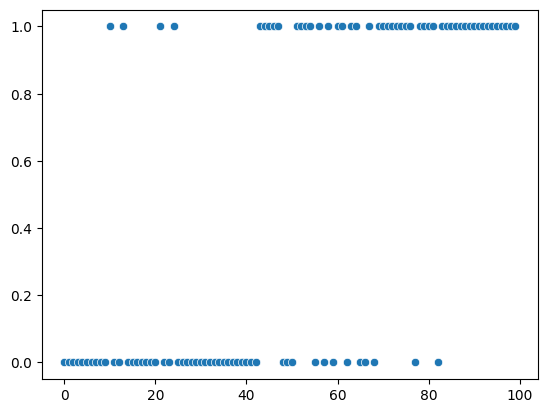

In [12]:
sns.scatterplot(obese)

Optimization terminated successfully.
         Current function value: 0.437402
         Iterations 7


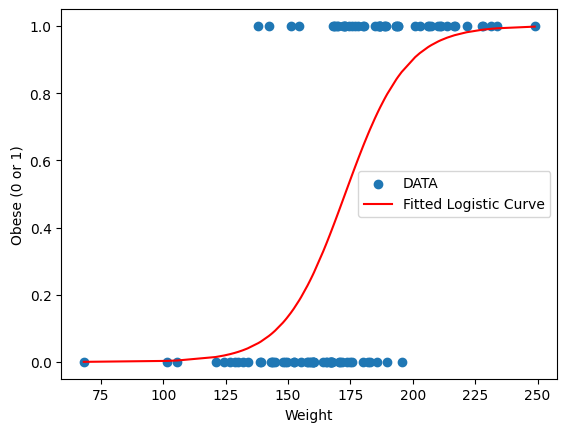

In [14]:
import statsmodels.api as sm
weights_with_constant=sm.add_constant(weights)
logit_model=sm.Logit(obese,weights_with_constant)
result=logit_model.fit()
fitted_probs=result.predict(weights_with_constant)
plt.scatter(weights,obese,label='DATA')
plt.plot(weights,fitted_probs,color='red',label='Fitted Logistic Curve')
plt.xlabel('Weight')
plt.ylabel('Obese (0 or 1)')
plt.legend()
plt.show()

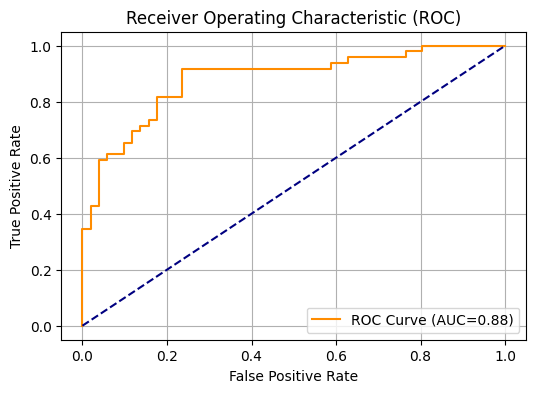

In [27]:
fpr,tpr,thresholds=roc_curve(obese,fitted_probs)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',linestyle='--') # [0,1]=range o the dhased line i.e from 0 to 1
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [23]:
fpr,tpr,thresholds=roc_curve(obese,fitted_probs)
roc_auc=auc(fpr,tpr)
print(fpr)
print(tpr)
print(thresholds)
print(roc_auc)

[0.         0.         0.         0.01960784 0.01960784 0.03921569
 0.03921569 0.05882353 0.05882353 0.09803922 0.09803922 0.11764706
 0.11764706 0.1372549  0.1372549  0.15686275 0.15686275 0.17647059
 0.17647059 0.23529412 0.23529412 0.58823529 0.58823529 0.62745098
 0.62745098 0.76470588 0.76470588 0.80392157 0.80392157 1.        ]
[0.         0.02040816 0.34693878 0.34693878 0.42857143 0.42857143
 0.59183673 0.59183673 0.6122449  0.6122449  0.65306122 0.65306122
 0.69387755 0.69387755 0.71428571 0.71428571 0.73469388 0.73469388
 0.81632653 0.81632653 0.91836735 0.91836735 0.93877551 0.93877551
 0.95918367 0.95918367 0.97959184 0.97959184 1.         1.        ]
[           inf 9.97909073e-01 9.07073295e-01 8.62796396e-01
 8.41056490e-01 7.97877962e-01 7.46540784e-01 7.39945418e-01
 7.24559050e-01 6.79841158e-01 6.44757005e-01 6.41759240e-01
 5.78960171e-01 5.59632778e-01 5.56642394e-01 5.39585186e-01
 5.31305324e-01 5.18660877e-01 4.81408612e-01 4.48248394e-01
 4.01646677e-01 1.93024

In [25]:
import pandas as pd
df=pd.DataFrame({'True Positive Rate':tpr,'False Positive Rate':fpr,'Threshold':thresholds})
df.head()

,True Positive Rate,False Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.020408,0.000000,0.997909
2,0.346939,0.000000,0.907073
3,0.346939,0.019608,0.862796
4,0.428571,0.019608,0.841056


In [26]:
df.shape

(30, 3)

In [32]:
X_logit=sm.add_constant(weights)
logit_model=sm.Logit(obese,X_logit).fit()
logit_probs=result.predict(X_logit)

Optimization terminated successfully.
         Current function value: 0.437402
         Iterations 7


In [29]:
weight_2d=weights.reshape(-1,1)
rf=RandomForestClassifier()
rf.fit(weight_2d,obese)
rf_probs=rf.predict_proba(weight_2d)[:,1]

In [33]:
fpr_logit,tpr_logit,_=roc_curve(obese,logit_probs)
roc_auc_logit=auc(fpr_logit,tpr_logit)

fpr_rf,tpr_rf,_=roc_curve(obese,rf_probs)
roc_auc_rf=auc(fpr_rf,tpr_rf)

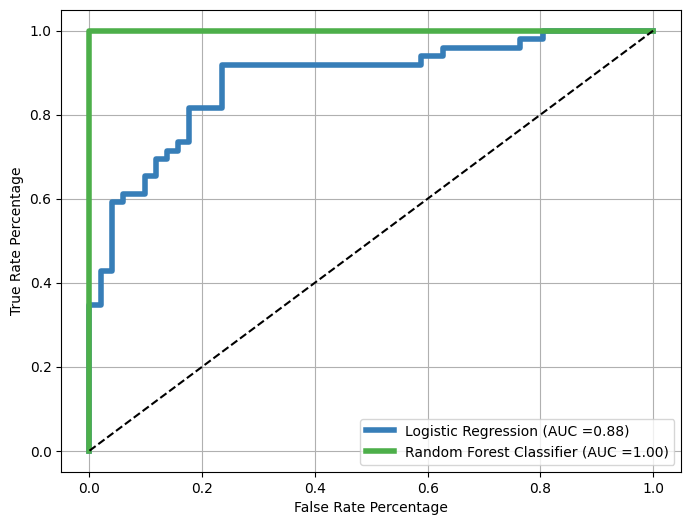

In [35]:
plt.figure(figsize=(8,6))
plt.plot(fpr_logit,tpr_logit,color='#377eb8',lw=4,label=f'Logistic Regression (AUC ={roc_auc_logit:.2f})')
plt.plot(fpr_rf,tpr_rf,color='#4daf4a',lw=4,label=f'Random Forest Classifier (AUC ={roc_auc_rf:.2f})')
plt.plot([0,1],'k--')
plt.xlabel('False Rate Percentage')
plt.ylabel('True Rate Percentage')
plt.legend(loc='lower right')
plt.grid()
plt.show()